# Kaggle - Forecasting Mini-Course Sales

---
## Dataset Description
For this challenge, you will be predicting a full year worth of sales for various fictitious learning modules from different fictitious Kaggle-branded stores in different (real!) countries. This dataset is completely synthetic, but contains many effects you see in real-world data, e.g., weekend and holiday effect, seasonality, etc. You are given the task of predicting sales during for year 2022.


## Explorative Data Analysis (EDA)

3 weeks of num_sold


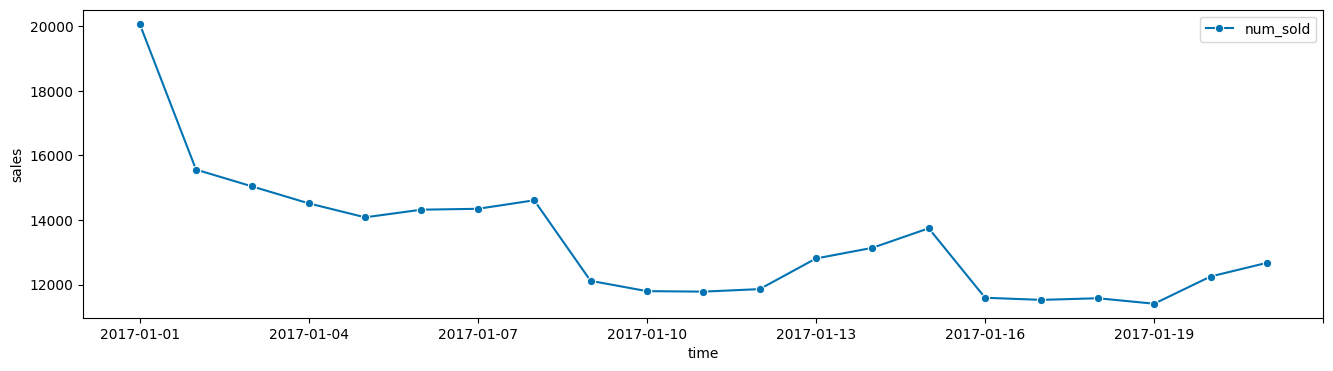

3 months of num_sold


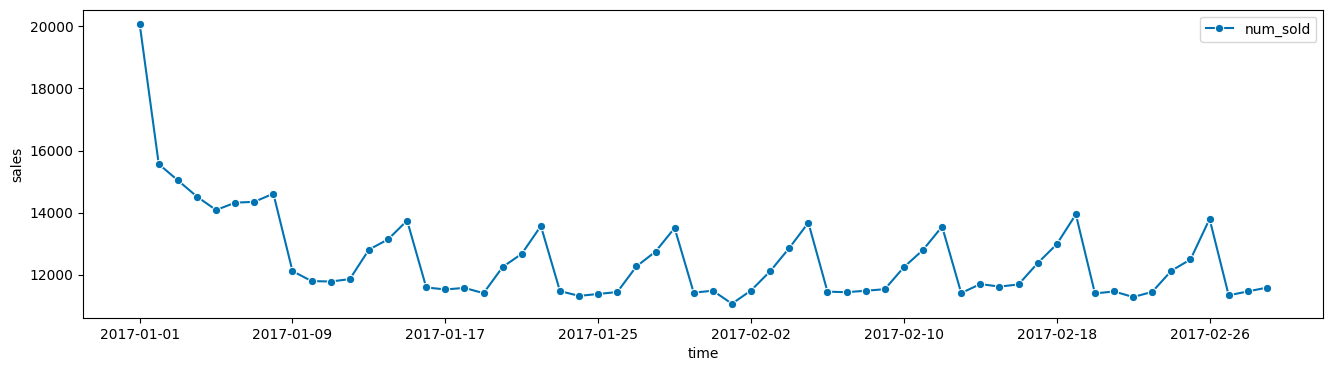

18 months of num_sold


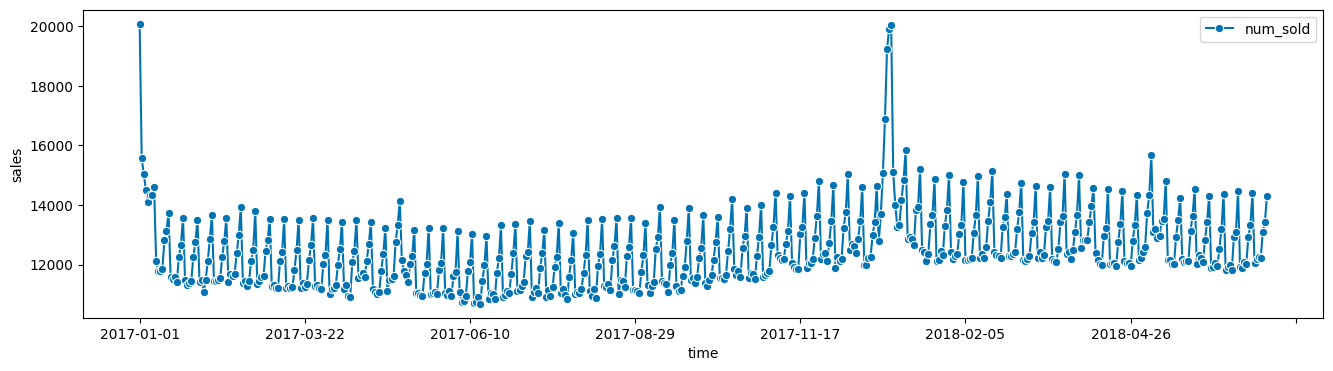

2020


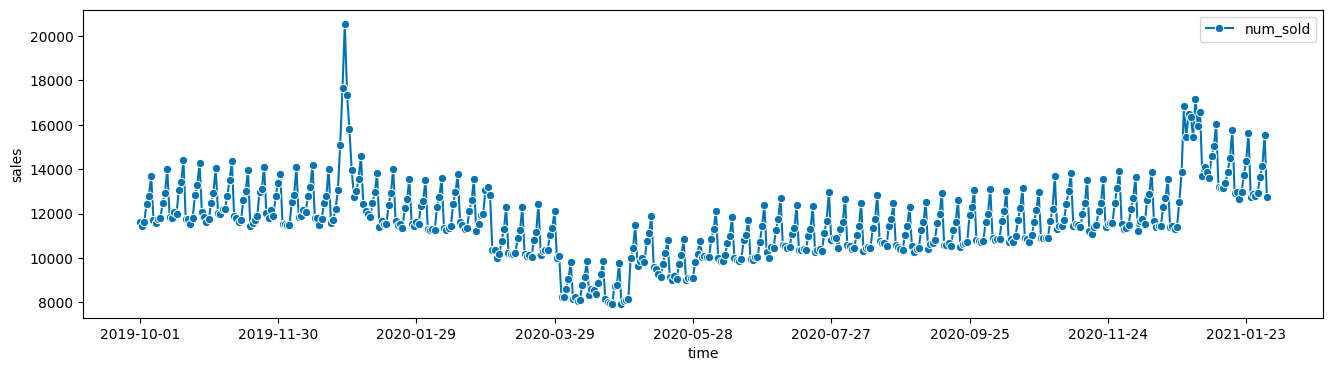

In [5]:
import data_loading
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

enc_products = LabelEncoder()
enc_stores = LabelEncoder()
enc_country = LabelEncoder()

df_train = data_loading.load_train_data_label( enc_country= enc_country, enc_product=enc_products, enc_store=enc_stores)

df_sales = df_train["num_sold"].groupby(df_train.index).agg(["sum"])

start_idx = "2017-01-01"
end_idx = "2017-01-21"

#The plot_series function is very useful when displaying timeseries data in an easily interpretable way
print("3 weeks of num_sold")
plot_series( df_sales[start_idx:end_idx], labels=["num_sold"], x_label="time", y_label = "sales")
plt.show()

#Let's plot the timeseries for 3 months
print("3 months of num_sold")
plot_series( df_sales["2017-01-01":"2017-03-01"], labels=["num_sold"], x_label="time", y_label = "sales")
plt.show()

#Let's plot the timeseries for 18 months
print("18 months of num_sold")
plot_series( df_sales["2017-01-01":"2018-07-01"], labels=["num_sold"], x_label="time", y_label = "sales")
plt.show()

#The plot_series function is very useful when displaying timeseries data in an easily interpretable way
print("2020")
plot_series( df_sales["2019-10-01":"2021-02-01"], labels=["num_sold"], x_label="time", y_label = "sales")
plt.show()

In the above graphs of num_sold variable, there are clear trends to observe:

- There appears to be a spike of sales that builds over the week to peak on Monday and then drops off again
- There's a slight increase in sales in the middle of the year
- There is a very large increase in sales at the end of the year in December

In [2]:
df_train.head()

,id,country,store,product,num_sold
date,,,,,
2017-01-01,0,Argentina,1,0,63
2017-01-01,1,Argentina,1,1,66
2017-01-01,2,Argentina,1,2,9
2017-01-01,3,Argentina,1,3,59
2017-01-01,4,Argentina,1,4,49


In [3]:
#Info about the columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 136950 entries, 2017-01-01 to 2021-12-31
Freq: D
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   id        136950 non-null  int64   
 1   country   136950 non-null  object  
 2   store     136950 non-null  category
 3   product   136950 non-null  category
 4   num_sold  136950 non-null  int64   
dtypes: category(2), int64(2), object(1)
memory usage: 4.4+ MB


Features:

- `PeriodIndex`: Date of sales
- `id`: id number of row
- `country`: The country where the sales were made
- `store`: The store the sales were made at
- `product`: The product that was bought
- `num_sold`: the number of sold products

In [4]:
#The summary statistics of the num_sold
df_train["num_sold"].describe()

count    136950.000000
mean        165.522636
std         183.691575
min           2.000000
25%          46.000000
50%          98.000000
75%         184.000000
max        1380.000000
Name: num_sold, dtype: float64

In [5]:
#Checking for duplicate rows
df_train.duplicated().sum()

0

In [6]:
#The countries in the country column
df_train["country"].unique()

array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object)

In [7]:
#The products in the df
print(df_train["product"].unique())
print(enc_products.classes_)

[0, 1, 2, 3, 4]
Categories (5, int64): [0, 1, 2, 3, 4]
['Using LLMs to Improve Your Coding' 'Using LLMs to Train More LLMs'
 'Using LLMs to Win Friends and Influence People'
 'Using LLMs to Win More Kaggle Competitions' 'Using LLMs to Write Better']


- 0 = 'Using LLMs to Improve Your Coding'
- 1 = 'Using LLMs to Train More LLMs'
- 2 = 'Using LLMs to Win Friends and Influence People'
- 3 = 'Using LLMs to Win More Kaggle Competitions'
- 4 = 'Using LLMs to Write Better'

In [8]:
#The stores in the df
print(df_train["store"].unique())
print(enc_stores.classes_)

[1, 2, 0]
Categories (3, int64): [0, 1, 2]
['Kagglazon' 'Kaggle Learn' 'Kaggle Store']


- 0 = 'Kagglazon'
- 1 = 'Kaggle Learn'
- 2 = 'Kaggle Store'

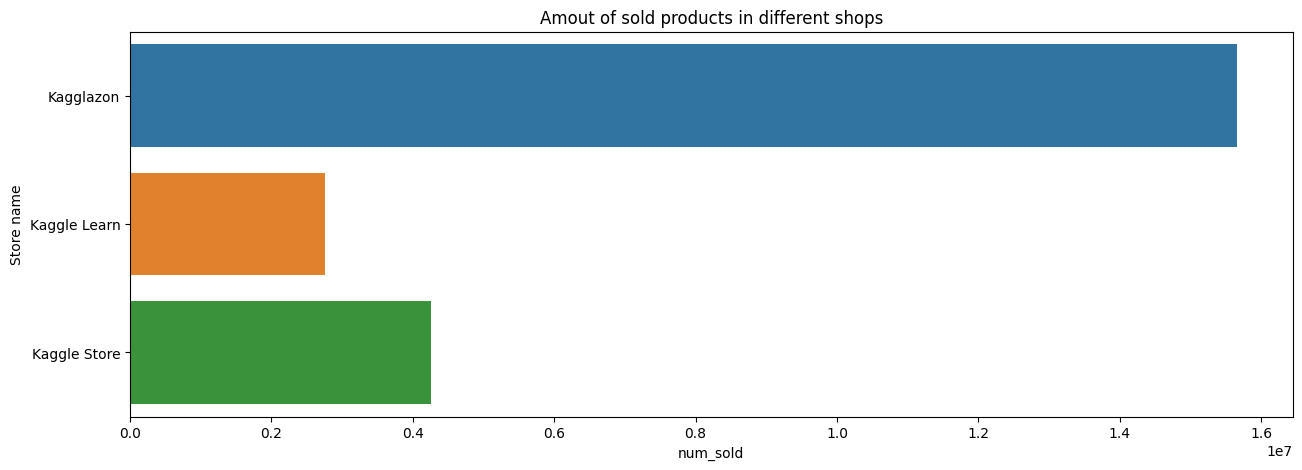

               id  num_sold
store                      
0      3126089175  15661335
1      3125632675   2755934
2      3125860925   4251056


In [9]:
import seaborn as sns

df_stores = df_train.groupby("store").sum("num_sold")

# Creating the bar plot to take a look at sales by shop name
plt.figure(figsize=(15, 5))
sns.barplot(x= df_stores["num_sold"], y=enc_stores.inverse_transform(df_stores.index))
plt.ylabel('Store name')
plt.title('Amout of sold products in different shops')
plt.show()

print(df_stores)

In [10]:
# Getting the sum of sales by country
all_sales = df_train["num_sold"].sum()

df_country = df_train.groupby("country").sum("num_sold")

# Count the percentage of of sales by country
percentage = []
for i in df_country["num_sold"]:
    percentage.append(i/all_sales*100)

# Create the column with persentages
df_country['percentage'] = percentage
df_country.drop(columns="id", axis=1, inplace=True)

# Take a look at what we have
df_country


,num_sold,percentage
country,,
Argentina,1683244,7.425533
Canada,7013114,30.937945
Estonia,3577319,15.781135
Japan,6013786,26.529468
Spain,4380862,19.325918


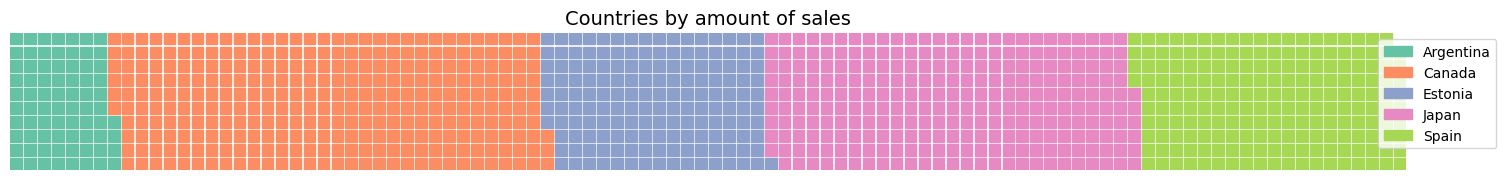

In [11]:
from pywaffle import Waffle

# Present data as Waffle plot
fig = plt.figure(FigureClass=Waffle, 
                 rows=10, columns=100,
                 values=df_country['percentage'],
                 figsize = (15,10),
                 labels=list(df_country.index),
                 legend={'loc':'upper right',
                         'bbox_to_anchor': (1.07, 1),
                        })
plt.title('Countries by amount of sales', fontdict={'size':14})
plt.tight_layout()
plt.show()

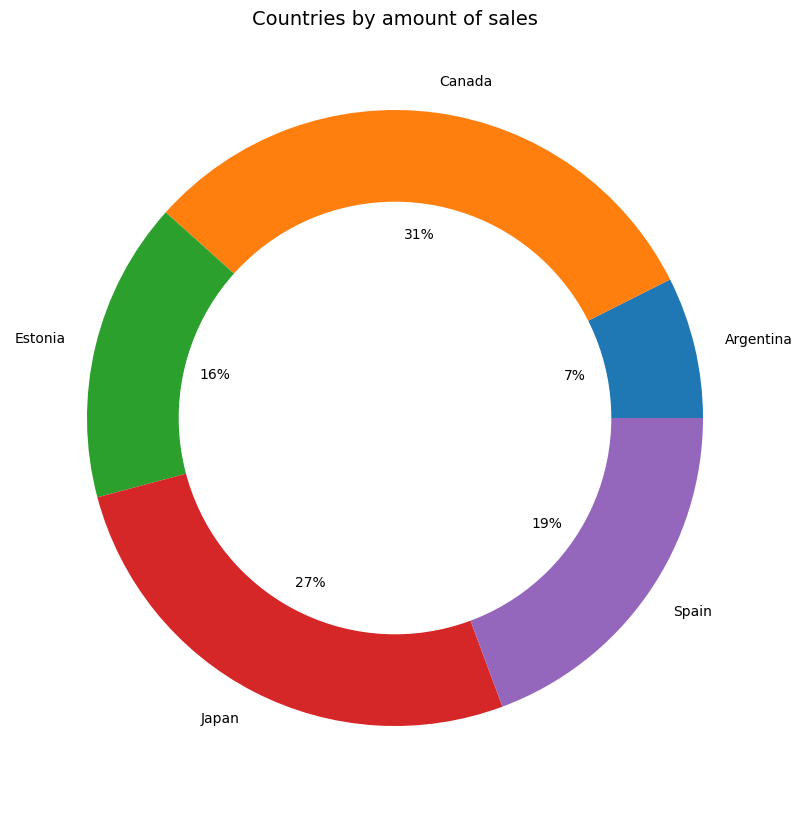

In [12]:
# Create the donut plot which will represent the persentage of sales by country
plt.figure(figsize=(10,10))
explode = [0, 0, 0, 0, 0]
plt.pie(df_country['percentage'], labels=list(df_country.index),
        explode=explode, autopct='%.0f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Countries by amount of sales', fontdict={'size':14})
plt.show()

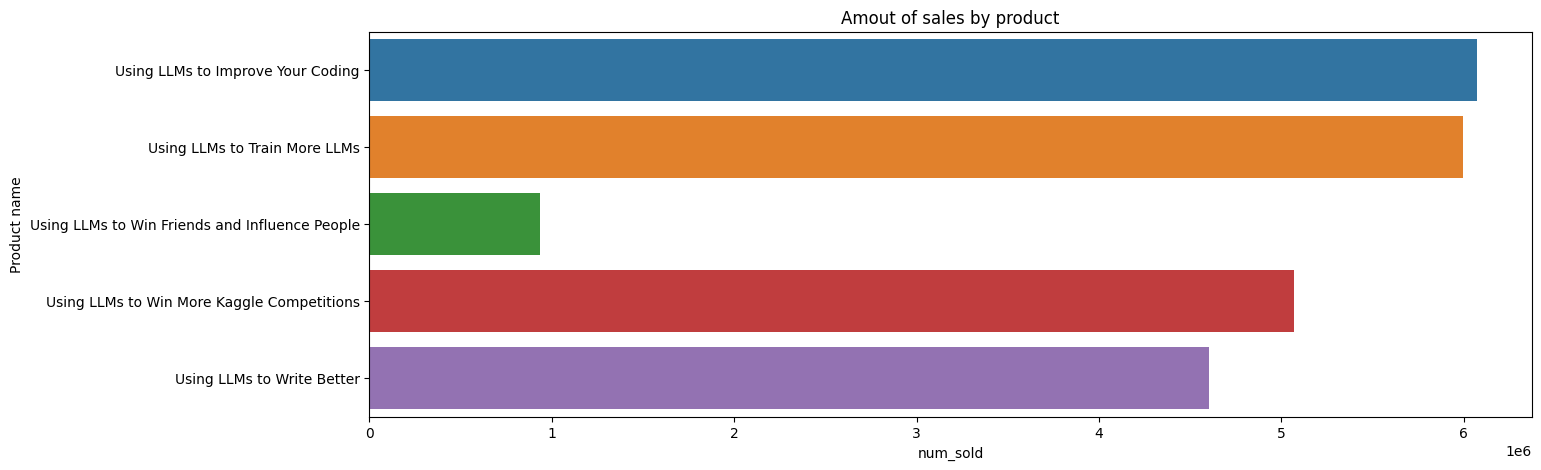

                                                num_sold
Using LLMs to Improve Your Coding                6069281
Using LLMs to Train More LLMs                    5993975
Using LLMs to Win Friends and Influence People    932564
Using LLMs to Win More Kaggle Competitions       5068313
Using LLMs to Write Better                       4604192


In [13]:
df_product = df_train.groupby("product").sum("num_sold")
df_product.index = enc_products.inverse_transform(df_product.index)
df_product.drop(columns="id", axis= 1, inplace=True)

# Creating the bar plot to take a look at sales by product
plt.figure(figsize=(15, 5))
sns.barplot(x= df_product["num_sold"], y=df_product.index)
plt.ylabel('Product name')
plt.title('Amout of sales by product')
plt.show()

print(df_product)

                                                num_sold  percentage
Using LLMs to Improve Your Coding                6069281   26.774281
Using LLMs to Train More LLMs                    5993975   26.442073
Using LLMs to Win Friends and Influence People    932564    4.113952
Using LLMs to Win More Kaggle Competitions       5068313   22.358569
Using LLMs to Write Better                       4604192   20.311126


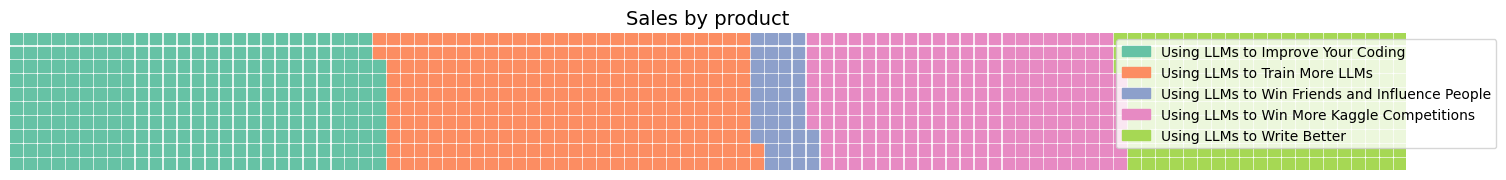

In [14]:
# Count the percentage of of sales to the top 10 cities.
percentage = []
for i in df_product["num_sold"]:
    percentage.append(i/all_sales*100)

# Create the column with persentages
df_product['percentage'] = percentage

# Take a look at what we have
print(df_product)

# Present data as Waffle plot
fig = plt.figure(FigureClass=Waffle, 
                 rows=10, columns=100,
                 values=df_product['percentage'],
                 figsize = (15,10),
                 labels=list(df_product.index),
                 legend={'loc':'upper right',
                         'bbox_to_anchor': (1.07, 1),
                        })
plt.title('Sales by product', fontdict={'size':14})
plt.tight_layout()
plt.show()

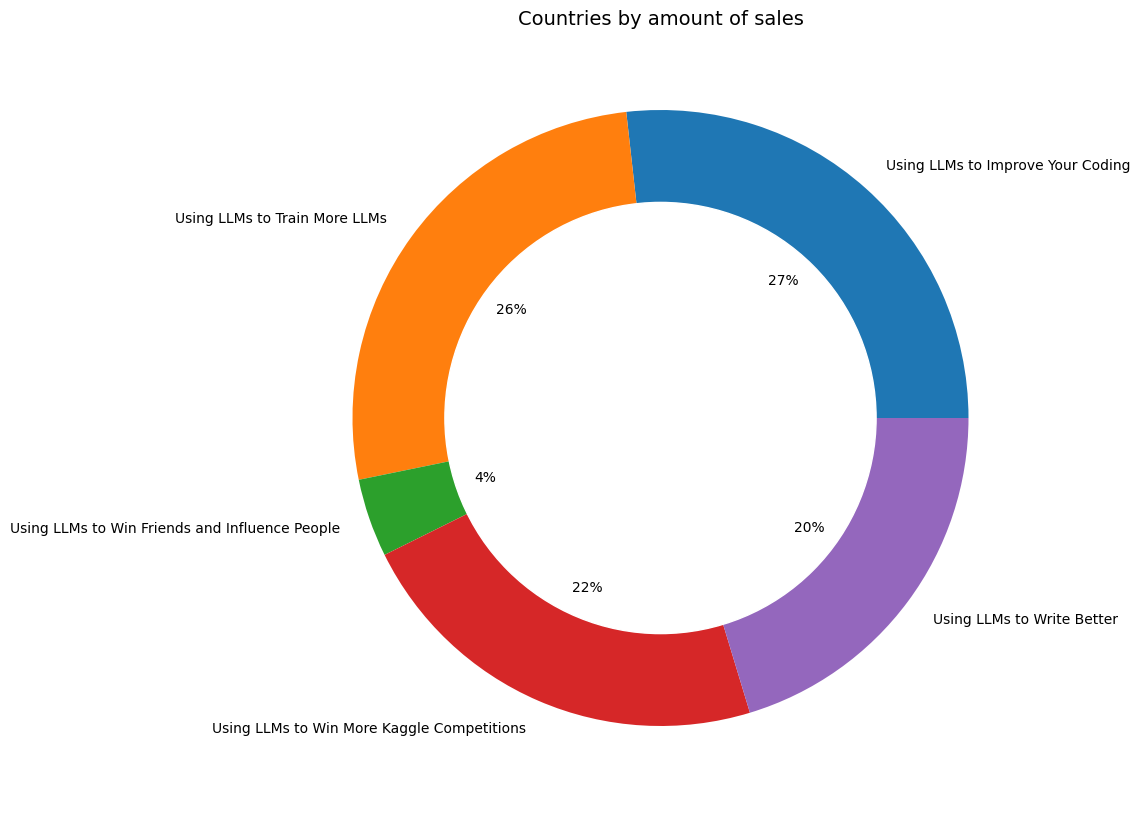

In [15]:
# Create the donut plot which will represent the persentage of sales by product
plt.figure(figsize=(10,10))
explode = [0, 0, 0, 0, 0]
plt.pie(df_product['percentage'], labels=list(df_product.index),
        explode=explode, autopct='%.0f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Countries by amount of sales', fontdict={'size':14})
plt.show()

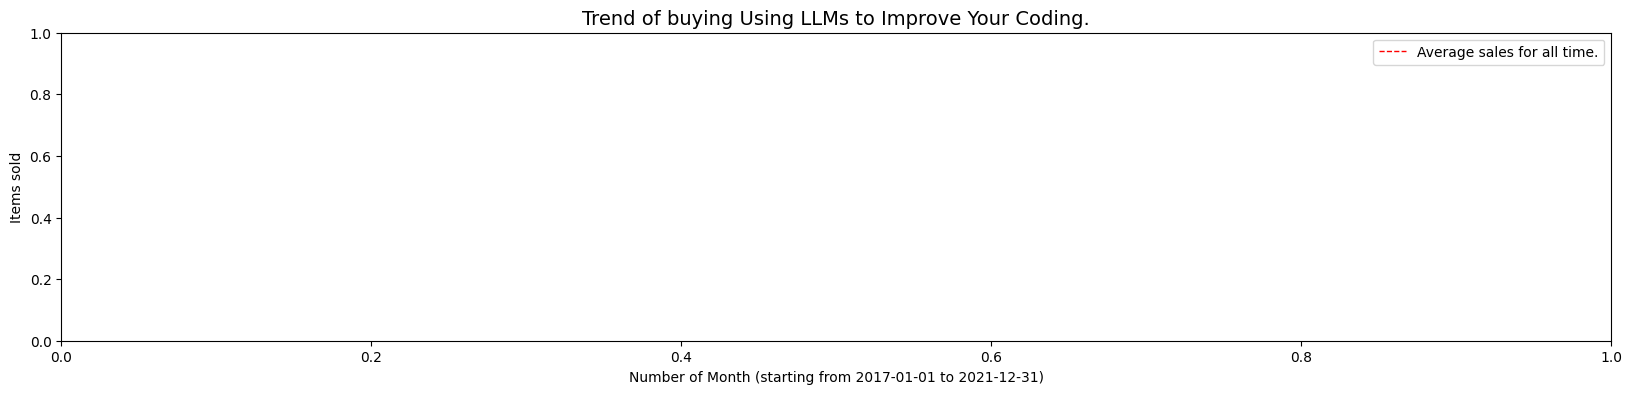

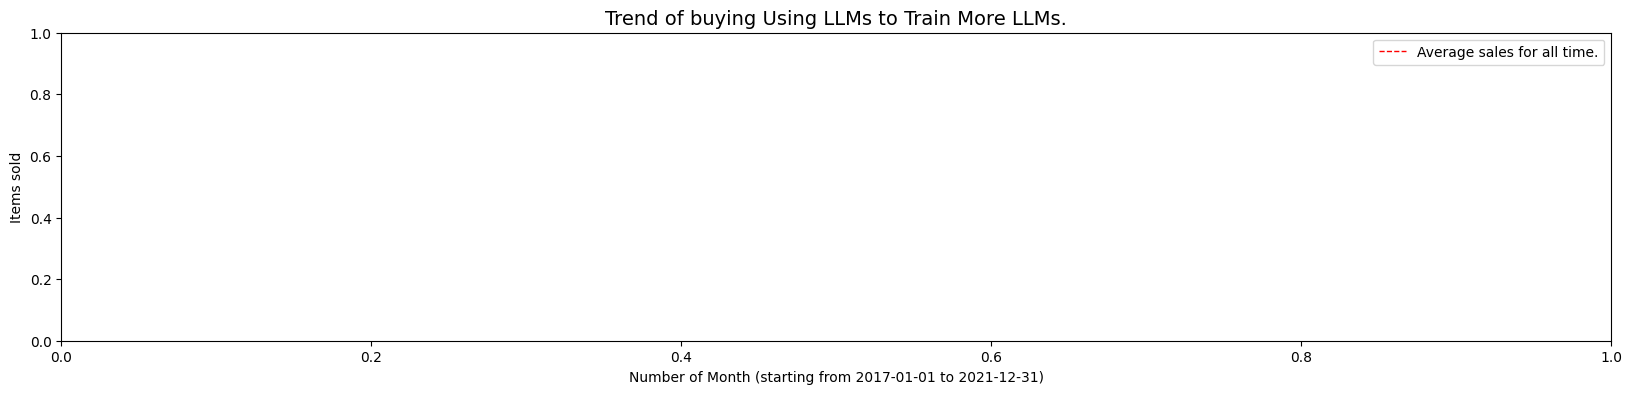

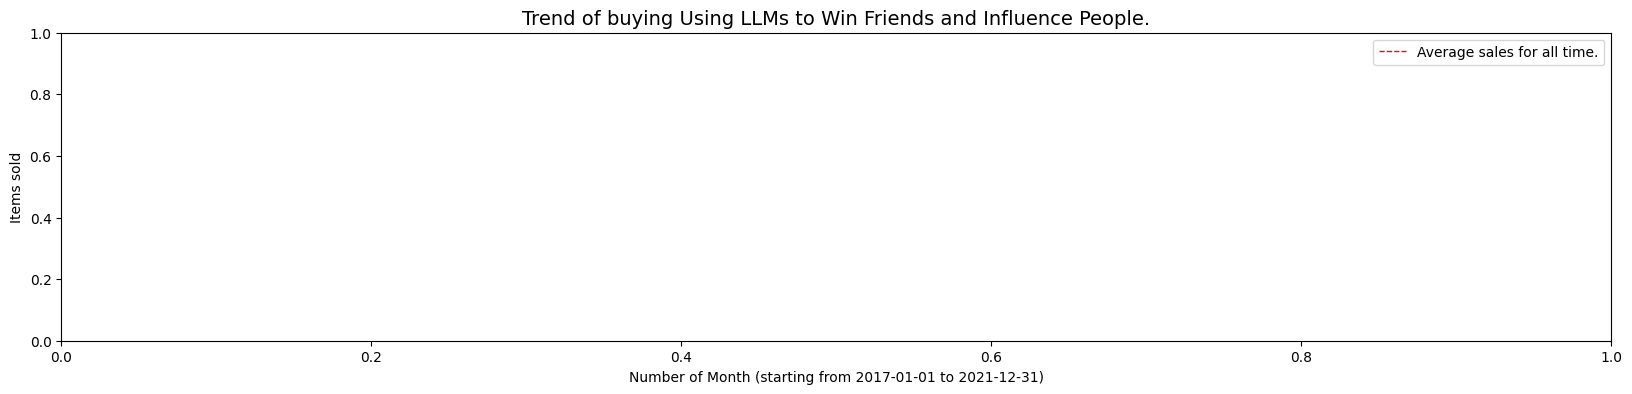

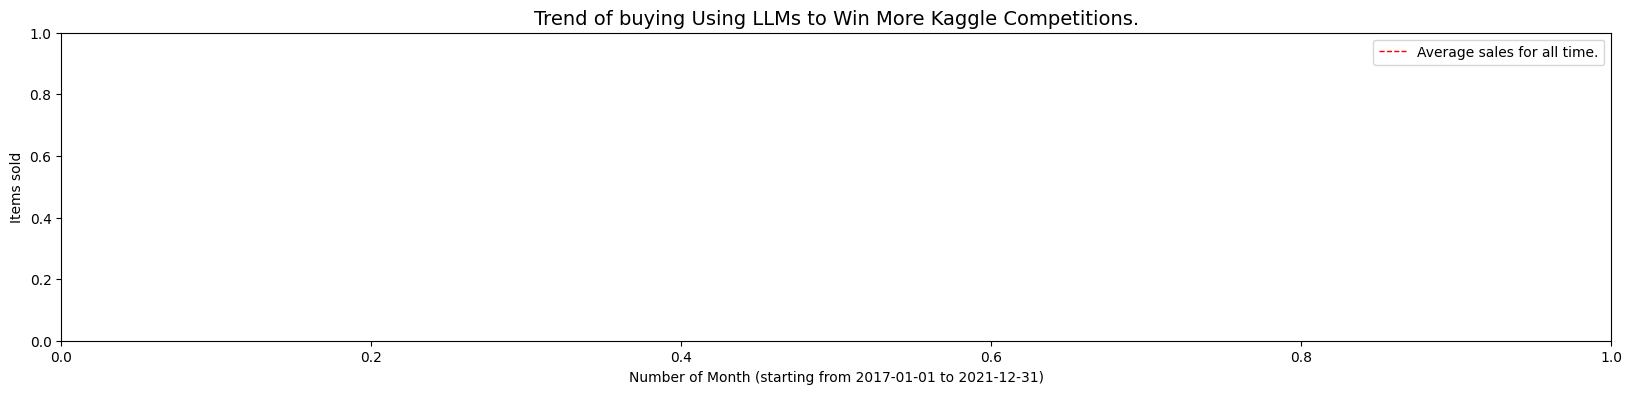

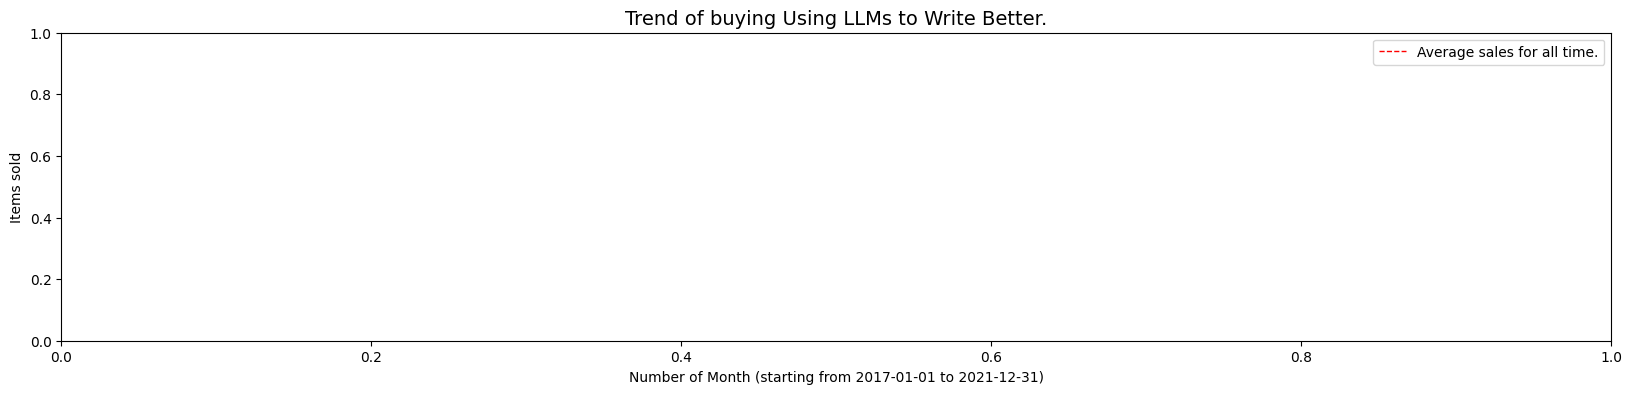



0


/tmp/ipykernel_5960/509472583.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["item_sales_day"] = sales.groupby(index).sum("num_sold")["num_sold"]


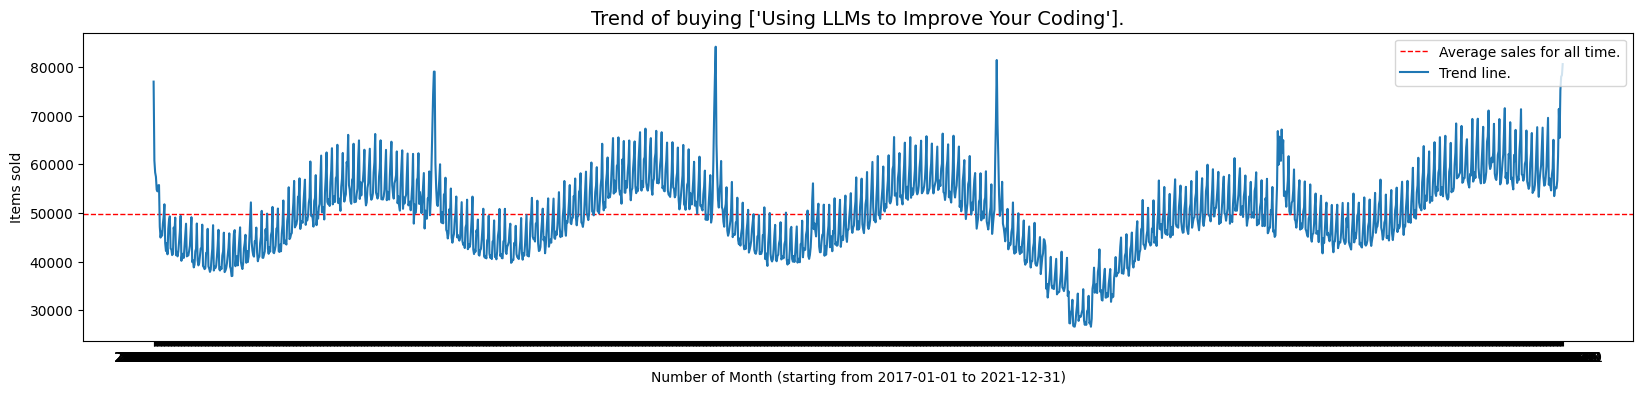



1


/tmp/ipykernel_5960/509472583.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["item_sales_day"] = sales.groupby(index).sum("num_sold")["num_sold"]


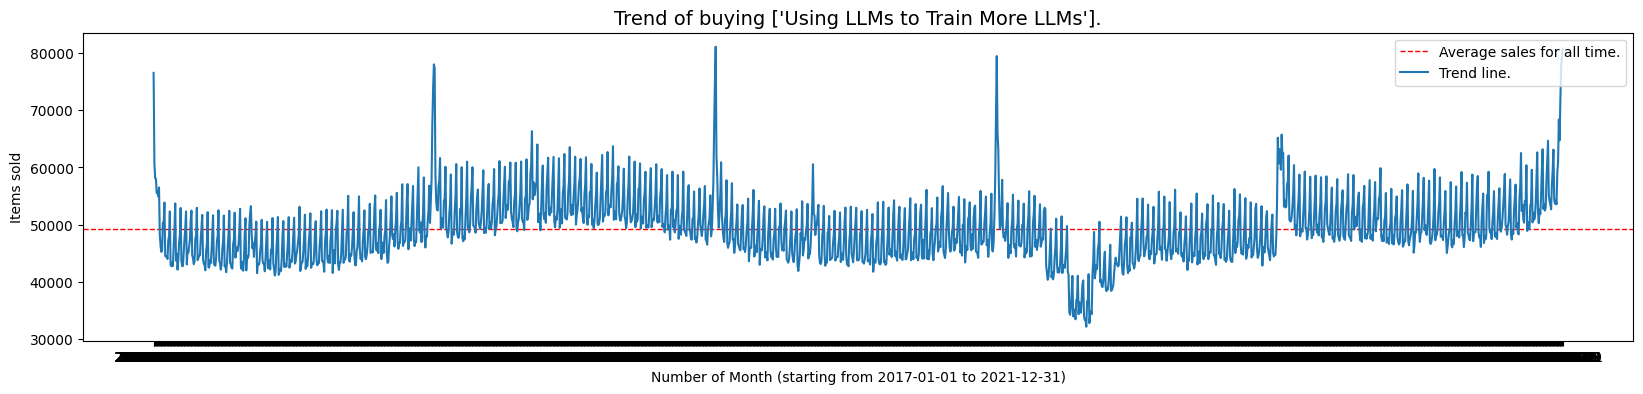



2


/tmp/ipykernel_5960/509472583.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["item_sales_day"] = sales.groupby(index).sum("num_sold")["num_sold"]


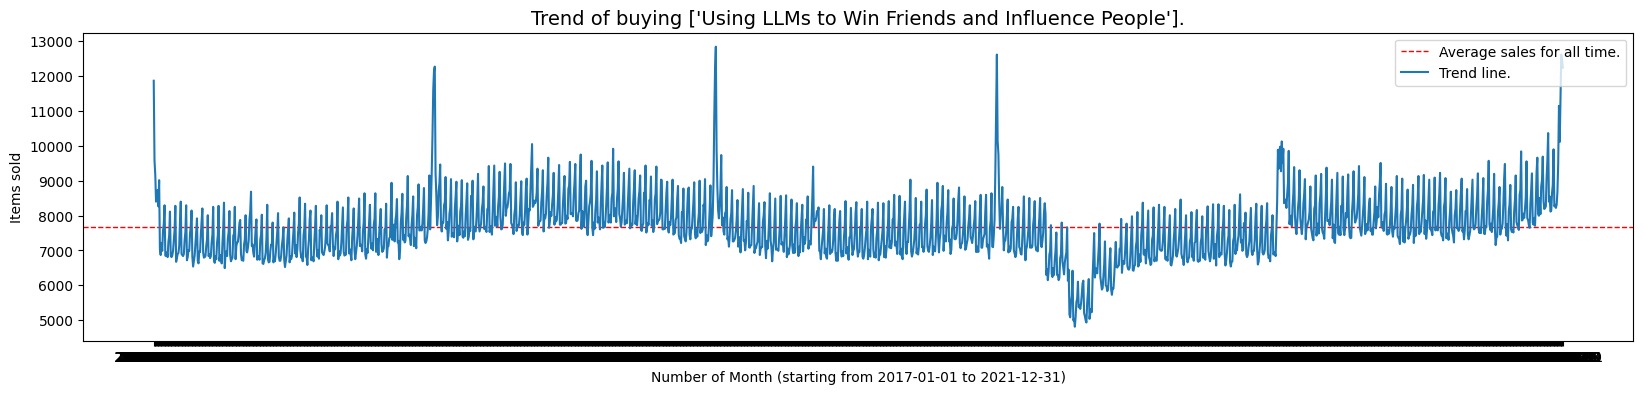



3


/tmp/ipykernel_5960/509472583.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["item_sales_day"] = sales.groupby(index).sum("num_sold")["num_sold"]


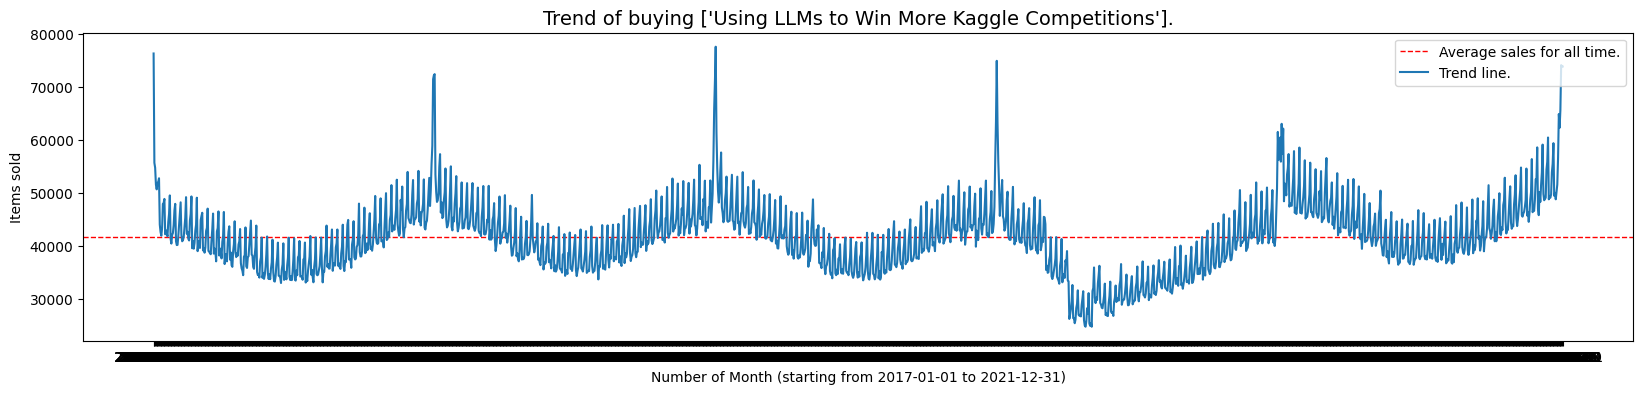



4


/tmp/ipykernel_5960/509472583.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["item_sales_day"] = sales.groupby(index).sum("num_sold")["num_sold"]


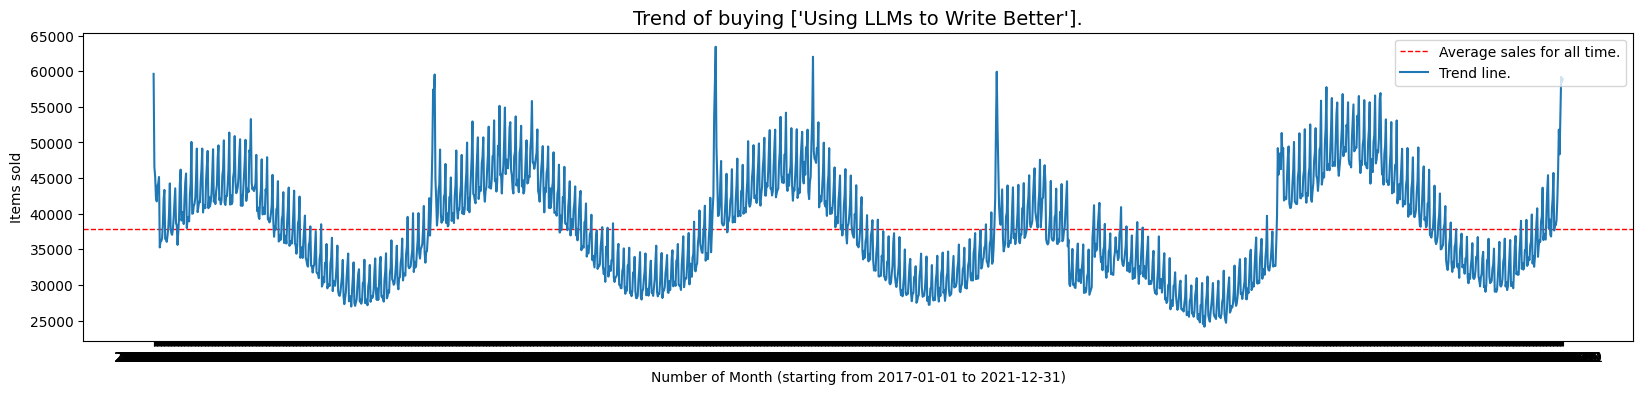

In [26]:
import numpy as np

# Calling the function from previos cell
category = "product"
labels = list(range(5))


for label in labels:
        sales = df_train[df_train[category] == label]
        index = sales.index
        sales["item_sales_day"] = sales.groupby(index).sum("num_sold")["num_sold"]
        sales = sales.groupby(sales.index)['item_sales_day'].sum().to_frame().reset_index()
        plt.figure(figsize=(20,4))
        plt.axhline (y =sales['item_sales_day'].mean(), color='red', linewidth = 1, linestyle ='dashed', label = 'Average sales for all time.')
        sns.lineplot(data=sales, x=sales['date'].astype("str"), y='item_sales_day', label = 'Trend line.')
        plt.title('Trend of buying ' + str(enc_products.inverse_transform(np.array([label]))) + '.', fontsize=14)
        plt.legend(loc = 'upper right')
        plt.xlabel('Number of Month (starting from 2017-01-01 to 2021-12-31)')
        plt.ylabel('Items sold')
        plt.show()
        print('\n')



Trends:

- Wave like patterns of seasonality of various strength
- Dip in sales for all products - most likely due to COVID


0


/tmp/ipykernel_5960/1376820001.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["item_sales_day"] = sales.groupby(index).sum("num_sold")["num_sold"]


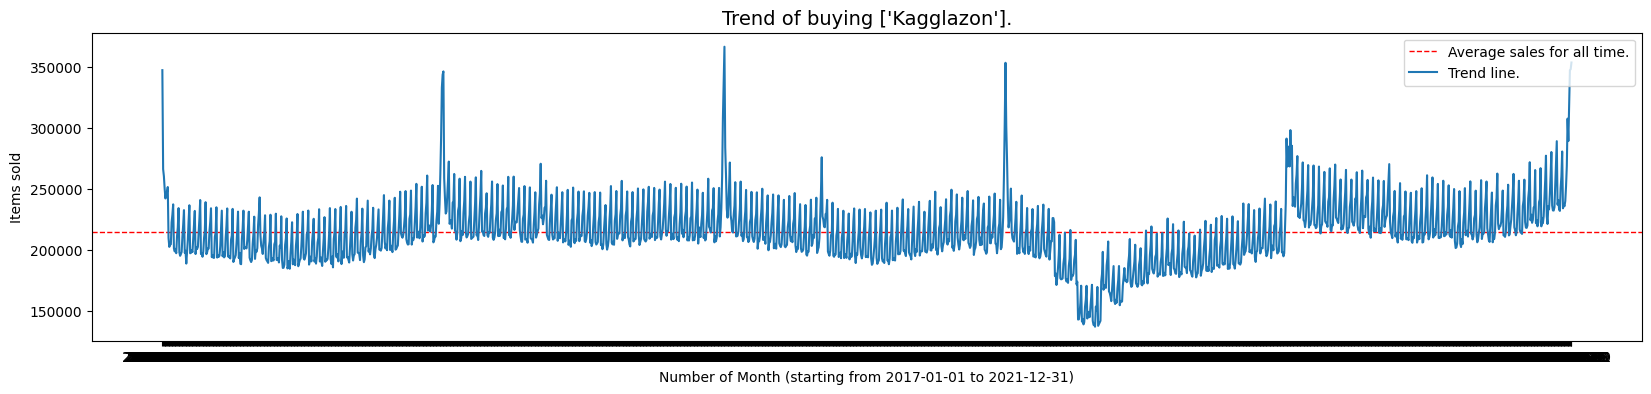



1


/tmp/ipykernel_5960/1376820001.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["item_sales_day"] = sales.groupby(index).sum("num_sold")["num_sold"]


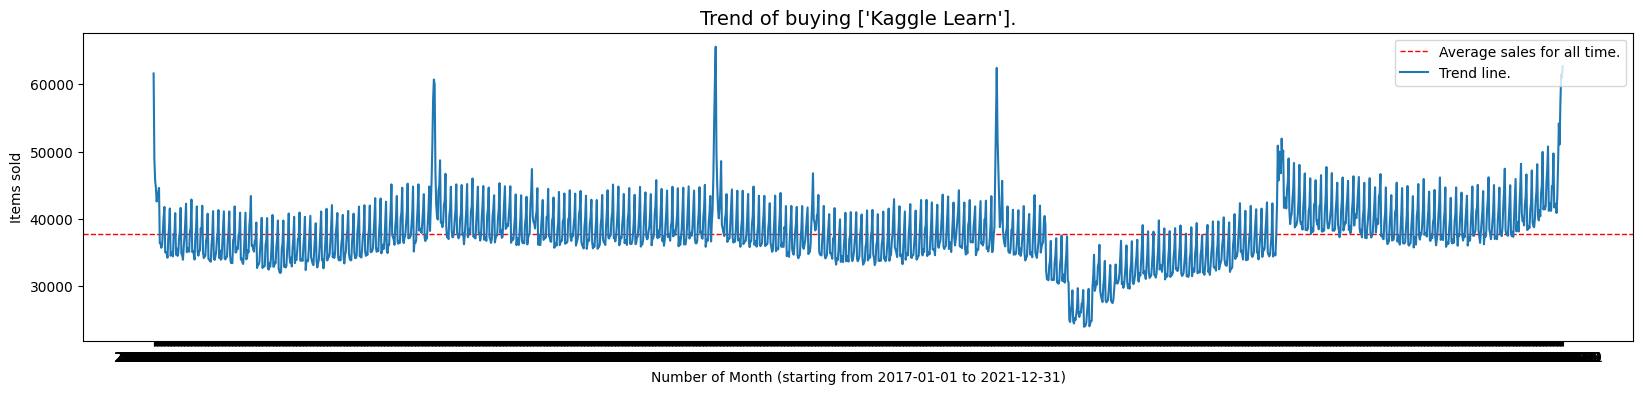



2


/tmp/ipykernel_5960/1376820001.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["item_sales_day"] = sales.groupby(index).sum("num_sold")["num_sold"]


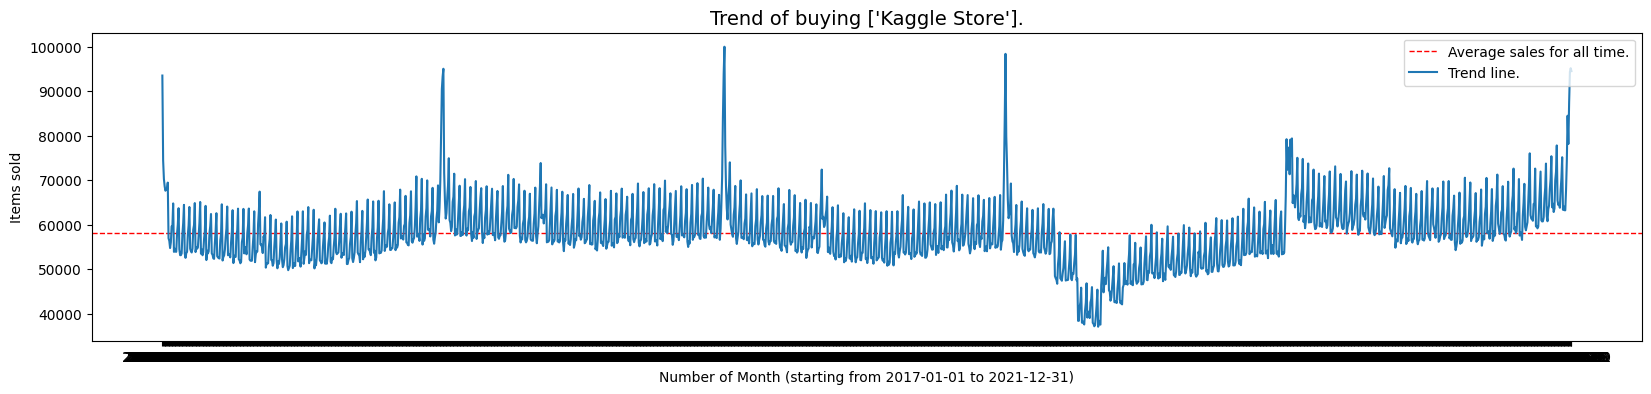



3


ValueError: y contains previously unseen labels: [3]

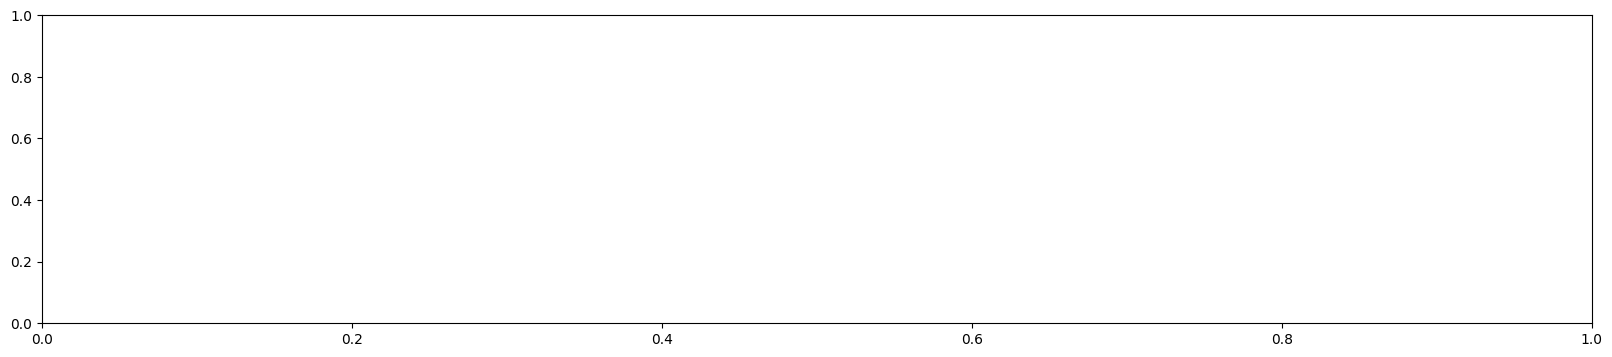

In [35]:
#Plotting the sales by store over time
category = "store"
labels = list(range(3))


for label in labels:
        sales = df_train[df_train[category] == label]
        index = sales.index
        sales["item_sales_day"] = sales.groupby(index).sum("num_sold")["num_sold"]
        sales = sales.groupby(sales.index)['item_sales_day'].sum().to_frame().reset_index()
        plt.figure(figsize=(20,4))
        plt.axhline (y =sales['item_sales_day'].mean(), color='red', linewidth = 1, linestyle ='dashed', label = 'Average sales for all time.')
        sns.lineplot(data=sales, x=sales['date'].astype("str"), y='item_sales_day', label = 'Trend line.')
        plt.title('Trend of buying ' + str(enc_stores.inverse_transform(np.array([label]))) + '.', fontsize=14)
        plt.legend(loc = 'upper right')
        plt.xlabel('Number of Month (starting from 2017-01-01 to 2021-12-31)')
        plt.ylabel('Items sold')
        plt.show()
        print('\n')


Trends:

- Sales are quite constant and linear
- There is a consistent spike at the end of the of each year
- As witht he product data, there is a dip in 2020, likely due to COVID

0


/tmp/ipykernel_5960/1308281738.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["item_sales_day"] = sales.groupby(index).sum("num_sold")["num_sold"]


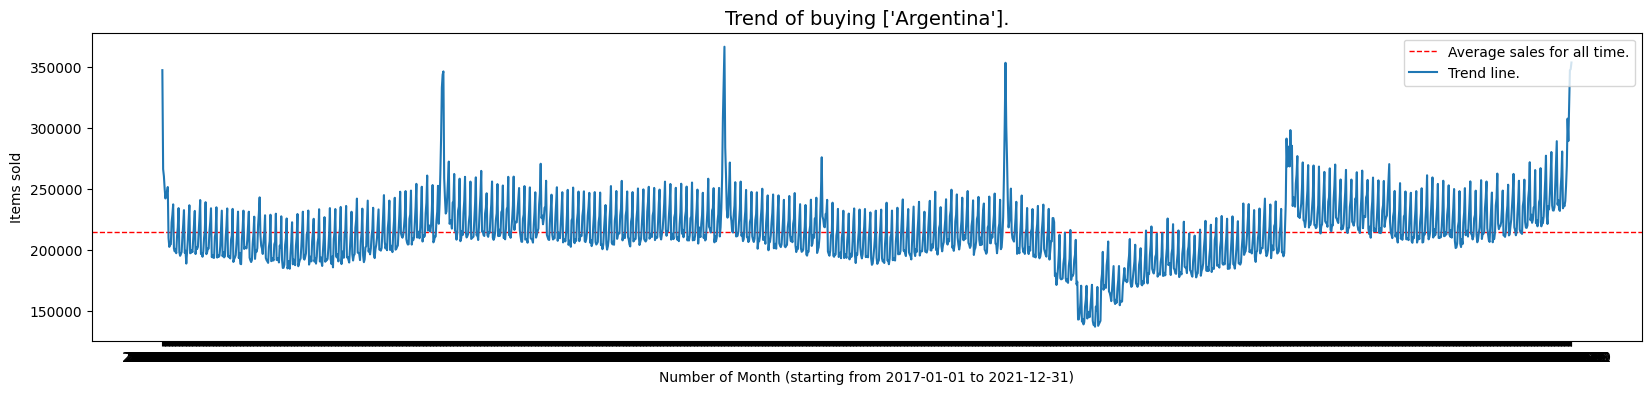



1


/tmp/ipykernel_5960/1308281738.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["item_sales_day"] = sales.groupby(index).sum("num_sold")["num_sold"]


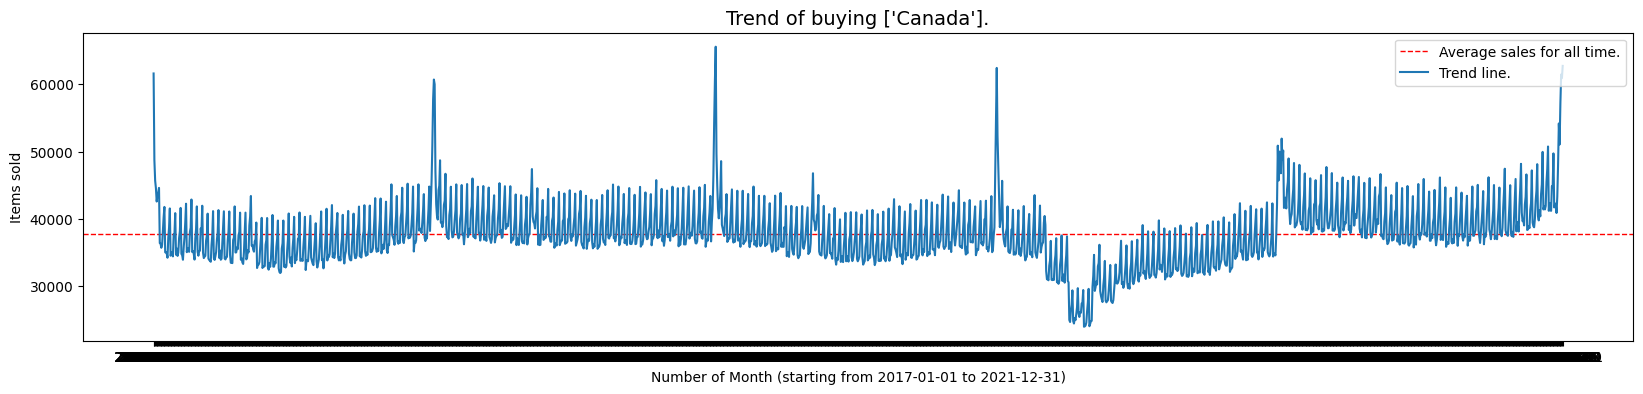



2


/tmp/ipykernel_5960/1308281738.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales["item_sales_day"] = sales.groupby(index).sum("num_sold")["num_sold"]


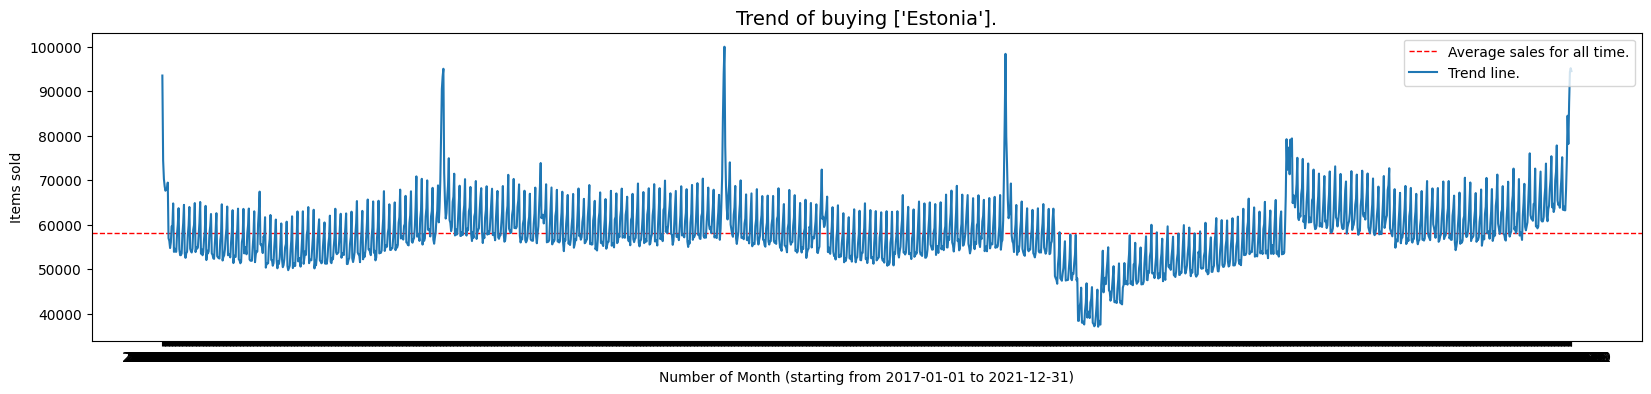



3


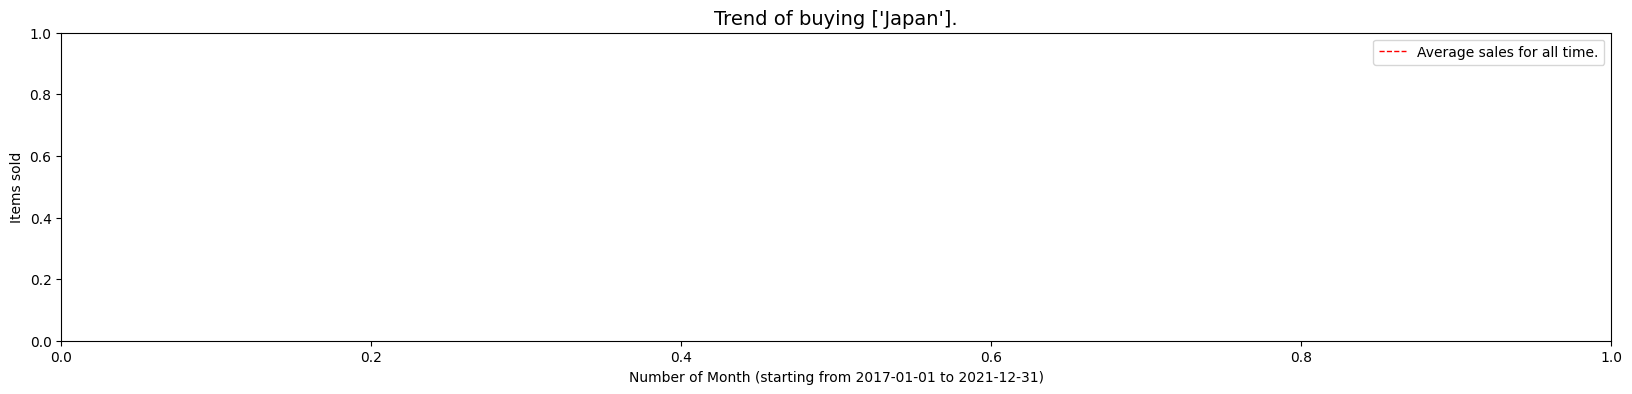



4


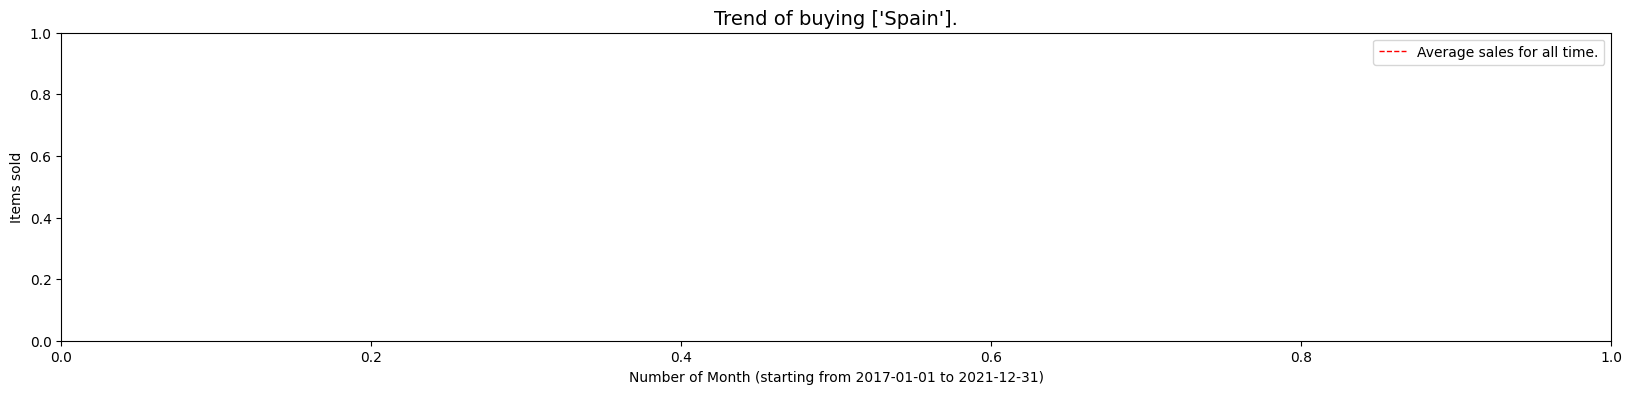

In [36]:
#Plotting the sales by country over time
enc_country = LabelEncoder()
df_train["country"] = enc_country.fit_transform(df_train["country"])

labels = list(range(5))


for label in labels:
        sales = df_train[df_train[category] == label]
        index = sales.index
        sales["item_sales_day"] = sales.groupby(index).sum("num_sold")["num_sold"]
        sales = sales.groupby(sales.index)['item_sales_day'].sum().to_frame().reset_index()
        plt.figure(figsize=(20,4))
        plt.axhline (y =sales['item_sales_day'].mean(), color='red', linewidth = 1, linestyle ='dashed', label = 'Average sales for all time.')
        sns.lineplot(data=sales, x=sales['date'].astype("str"), y='item_sales_day', label = 'Trend line.')
        plt.title('Trend of buying ' + str(enc_country.inverse_transform(np.array([label]))) + '.', fontsize=14)
        plt.legend(loc = 'upper right')
        plt.xlabel('Number of Month (starting from 2017-01-01 to 2021-12-31)')
        plt.ylabel('Items sold')
        plt.show()
        print('\n')

Trends:

- The sales by country look very similar to the sales by store
- There doesn't appear to be any sales for Japan or Spain

## Baseline Model

Let's start training a baseline model and evaluate it. We will me measuring all models based on their Mean Average Error and Mean Average Percentage Error (MAPE) for consistency. A Thetaforecaster model is a good place to start.

In [1]:
import data_loading
import pandas as pd
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon

df_train = data_loading.load_train_data_one()

#We drop the time period where COVID impacted the data across all features, as it might skew
#the training data
start_idx = "2020-01-01"
end_idx = "2020-08-01"

df_train.drop([start_idx, end_idx], inplace= True)
df_train.set_index("id", inplace=True, drop= True)

#We split the dataset into features and labels. We need to predict the id and num_sold column
X = df_train[["date","Argentina", "Canada", "Estonia", "Japan", "Spain", "Kagglazon", "Kaggle Learn",
              "Kaggle Store", "Using LLMs to Improve Your Coding", 'Using LLMs to Train More LLMs',
              'Using LLMs to Win Friends and Influence People', 'Using LLMs to Win More Kaggle Competitions',
              'Using LLMs to Write Better']]
y = df_train["num_sold"]

y_train, y_val, X_train, X_val = temporal_train_test_split(y=y, X=X, test_size=0.2)

#The forecasting horizon needs to cover the span of the validation set

fh = ForecastingHorizon(y_val.index, is_relative= False)

In [2]:
from sktime.forecasting.theta import ThetaForecaster

#The baseline model will use the ThetaForecaster trained and validated on the split dataset
#We set seasonality to yearly as seen in the EDA

forecaster_naive = ThetaForecaster(sp=365)

forecaster_naive.fit(y=y_train, X=X_train)

ThetaForecaster(sp=365)

In [3]:
y_pred = forecaster_naive.predict(fh=fh, X=X_val)

ci = forecaster_naive.predict_interval(fh=fh, X=X_val, coverage=0.95)

/home/niclaswiegleb/miniconda3/envs/kaggle/lib/python3.11/site-packages/sktime/forecasting/base/_base.py:683: UserWarning: In 0.22.0, predict_interval return default column level 0 name will change for univariate probabilistic interval forecasts from 'Coverage' to variable name. The old behaviour can be retained by setting the legacy_interface argument to True, until 0.23.0 when the legacy_interface argument will be removed.
  warn(


<class 'pandas.core.frame.DataFrame'>
Index: 27390 entries, 109560 to 136949
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   (Coverage, 0.95, lower)  27390 non-null  float64
 1   (Coverage, 0.95, upper)  27390 non-null  float64
dtypes: float64(2)
memory usage: 642.0 KB
None


Mean Average Error: 304.7668368983473
Mean Average Percentage Error: 4.949315433912025


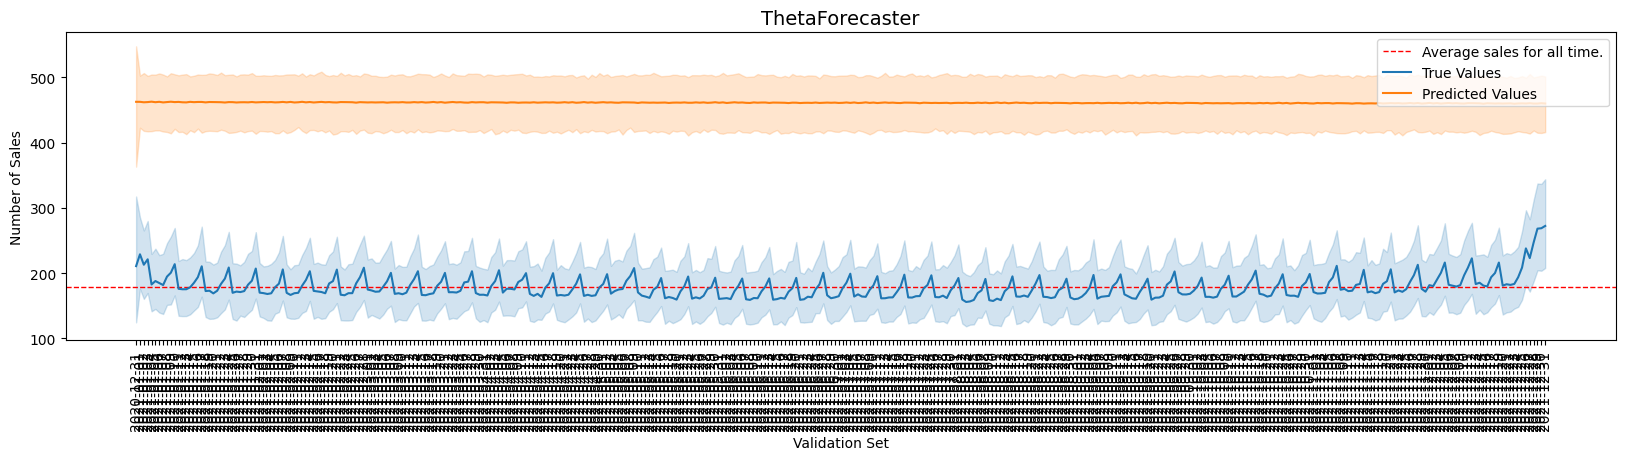

In [18]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns

df_theta = pd.DataFrame(columns=["date", "num_sol_true", "num_sol_pred", "ci_lower", "ci_upper"])
df_theta["date"] = X_val["date"]
df_theta["num_sold_true"] = y_val
df_theta["num_sold_pred"] = y_pred
df_theta.set_index("date", drop= True, inplace= True)

#The mean absolute error and mean absolute percentage error are useful indicators
#of how well or poorly the model is performing, especially when we want to compare two models later on.
mae = mean_absolute_error(y_val, y_pred)
mape = mean_absolute_percentage_error(y_val, y_pred)

#We visualise the predicted and true values of the validation set

print(f"Mean Average Error: {mae}")
print(f"Mean Average Percentage Error: {mape}")

plt.figure(figsize=(20,4))
plt.axhline (y =df_theta["num_sold_true"].mean(), color='red', linewidth = 1, linestyle ='dashed', label = 'Average sales for all time.')
sns.lineplot(data=df_theta, x=df_theta.index.astype("str"), y='num_sold_true', label = 'True Values')
sns.lineplot(data=df_theta, x=df_theta.index.astype("str"), y='num_sold_pred', label = 'Predicted Values')
plt.title('ThetaForecaster', fontsize=14)
plt.legend(loc = 'upper right')
plt.xlabel('Validation Set')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)
plt.show()

## AutoARIMA Model

In [4]:
from sktime.forecasting.fbprophet import Prophet

df_train = data_loading.load_train_data_one()

#We drop the time period where COVID impacted the data across all features, as it might skew
#the training data
start_idx = "2020-01-01"
end_idx = "2020-08-01"

df_train.drop([start_idx, end_idx], inplace= True)
df_train.set_index("id", inplace=True, drop= True)

#We split the dataset into features and labels. We need to predict the id and num_sold column
X_train_arima = pd.DataFrame(columns =["Argentina", "Canada", "Estonia", "Japan", "Spain", "Kagglazon", "Kaggle Learn",
              "Kaggle Store", "Using LLMs to Improve Your Coding", 'Using LLMs to Train More LLMs',
              'Using LLMs to Win Friends and Influence People', 'Using LLMs to Win More Kaggle Competitions',
              'Using LLMs to Write Better'])


X_train_arima["Argentina"] = df_train["Argentina"].iloc[:-27375]
X_train_arima["Canada"] = df_train["Canada"].iloc[:-27375]
X_train_arima["Estonia"] = df_train["Estonia"].iloc[:-27375]
X_train_arima["Japan"] = df_train["Japan"].iloc[:-27375]
X_train_arima["Spain"] = df_train["Spain"].iloc[:-27375]
X_train_arima["Kagglazon"] = df_train["Kagglazon"].iloc[:-27375]
X_train_arima["Kaggle Learn"] = df_train["Kaggle Learn"].iloc[:-27375]
X_train_arima["Kaggle Store"] = df_train["Kaggle Store"].iloc[:-27375]
X_train_arima["Using LLMs to Improve Your Coding"] = df_train["Using LLMs to Improve Your Coding"].iloc[:-27375]
X_train_arima["Using LLMs to Train More LLMs"] = df_train["Using LLMs to Train More LLMs"].iloc[:-27375]
X_train_arima["Using LLMs to Win Friends and Influence People"] = df_train["Using LLMs to Win Friends and Influence People"].iloc[:-27375]
X_train_arima["Using LLMs to Win More Kaggle Competitions"] = df_train["Using LLMs to Win More Kaggle Competitions"].iloc[:-27375]
X_train_arima["Using LLMs to Write Better"] = df_train["Using LLMs to Write Better"].iloc[:-27375]



y = df_train["num_sold"][:-27375]

y.reset_index()

#The forecasting horizon needs to cover the span of the validation set

fh = ForecastingHorizon(y.index, is_relative= False)

X_train_arima.reset_index()

0          63
1          66
2           9
3          59
4          49
         ... 
109555    615
109556    549
109557     90
109558    520
109559    460
Name: num_sold, Length: 109560, dtype: int64
        Argentina  Canada  Estonia  Japan  Spain  Kagglazon  Kaggle Learn  \
0               1       0        0      0      0          0             1   
1               1       0        0      0      0          0             1   
2               1       0        0      0      0          0             1   
3               1       0        0      0      0          0             1   
4               1       0        0      0      0          0             1   
...           ...     ...      ...    ...    ...        ...           ...   
109555          0       0        0      1      0          1             0   
109556          0       0        0      1      0          1             0   
109557          0       0        0      1      0          1             0   
109558          0       0      

In [ ]:
from sktime.forecasting.arima import AutoARIMA

forecaster_arima = AutoARIMA(sp=1)

forecaster_arima.fit(y=y, X=X_train_arima)

In [ ]:
X_val_arima = X_val.drop("date", axis=1)

file_path = "./autoarima"

data_loading.save_model(forecaster_arima, file_path, y_val, X_val_arima)

y_pred_arima = forecaster_arima.predict(fh=fh, X=X_val_arima)

In [ ]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns

df_arima = pd.DataFrame(columns=["date", "num_sol_true", "num_sol_pred"])
df_arima["date"] = X_val["date"]
df_arima["num_sold_true"] = y_val
df_arima["num_sold_pred"] = y_pred_arima
df_arima.set_index("date", drop= True, inplace= True)

#The mean absolute error and mean absolute percentage error are useful indicators
#of how well or poorly the model is performing, especially when we want to compare two models later on.
mae = mean_absolute_error(y_val, y_pred_arima)
mape = mean_absolute_percentage_error(y_val, y_pred_arima)

#We visualise the predicted and true values of the validation set

print(f"Mean Average Error: {mae}")
print(f"Mean Average Percentage Error: {mape}")

plt.figure(figsize=(20,4))
plt.axhline (y =df_arima["num_sold_true"].mean(), color='red', linewidth = 1, linestyle ='dashed',
            label = 'Average sales for all time.')
sns.lineplot(data=df_arima, x=df_arima.index.astype("str"), y='num_sold_true', label = 'True Values')
sns.lineplot(data=df_arima, x=df_arima.index.astype("str"), y='num_sold_pred', label = 'Predicted Values')
plt.title('AutoARIMA Forecaster', fontsize=14)
plt.legend(loc = 'upper right')
plt.xlabel('Validation Set')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)
plt.show()

In [ ]:
y_pred = forecaster_arima.predict(fh= fh, X=X_test)

y_pred_csv = y_pred

y_pred_csv.reset_index()

submission = pd.DataFrame(columns=["id", "num_sold"])

submission["id"] = range(136950, 164325)
submission["num_sold"] = list(y_pred_csv.tolist())

file_path = "./submission.csv"

submission.to_csv(file_path)